In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv(r"/content/Reviews.csv")

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [11]:
df.Score.value_counts()

,count
Score,
5,95976
4,22253
1,14098
3,11980
2,8211


/tmp/ipython-input-4209914561.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


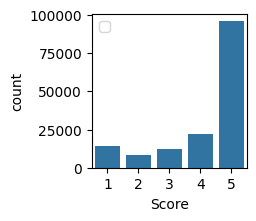

In [12]:
plt.figure(figsize=(2,2))
sns.countplot(x="Score" , data= df)
plt.legend()

In [13]:
df=df[["Text","Score"]]

In [14]:
df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [15]:
df.isna().sum()

,0
Text,0
Score,0


In [16]:
blanks = []

for index , text in df['Text'].items():
  if text.isspace():
    blanks.append(index)
len(blanks)

0

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re

lemma = WordNetLemmatizer()

In [19]:
nlp = spacy.load('en_core_web_sm')
nlp = spacy.blank('en')

list1 = nlp.Defaults.stop_words
print("number of spacy ", len(list1))

import nltk
nltk.download('stopwords')
list2 = set(stopwords.words('english'))
print("number of nltk ", len(list2))

stopwords = set(list1 | list2)
print("number of stopwords ", len(stopwords))

number of spacy  326
number of nltk  198
number of stopwords  401


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
from sklearn.model_selection import train_test_split

x = df['Text']
y= df['Score']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state=42)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vc = TfidfVectorizer()
x_train_tfidf = vc.fit_transform(x_train)

In [22]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [23]:
text_clf = Pipeline([('tfidf' , TfidfVectorizer()) , ('clf' , LinearSVC())])
text_clf.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , classification_report

In [25]:
def model(model):

  y_pred1 = model.predict(x_test)
  print("accuracy_score :",accuracy_score(y_test , y_pred1))
  print("confusion_matrix :",confusion_matrix(y_test , y_pred1))
  print(classification_report(y_test, y_pred1))


In [26]:
model(text_clf)

accuracy_score : 0.7320736722894439
confusion_matrix : [[ 3067   242   193   151   945]
 [  668   618   431   283   716]
 [  373   254  1270   753  1342]
 [  188   103   433  2080  4592]
 [  344   103   278  1093 29811]]
              precision    recall  f1-score   support

           1       0.66      0.67      0.66      4598
           2       0.47      0.23      0.31      2716
           3       0.49      0.32      0.39      3992
           4       0.48      0.28      0.35      7396
           5       0.80      0.94      0.86     31629

    accuracy                           0.73     50331
   macro avg       0.58      0.49      0.51     50331
weighted avg       0.70      0.73      0.70     50331

